In [90]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from  sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import *

import seaborn as sns
from pca import pca
from sklearn.model_selection import StratifiedKFold,KFold,GridSearchCV,cross_val_score

In [11]:
df = pd.read_csv(r"D:\Datasets\milk.csv",index_col=0)
df.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


In [12]:
df.shape

(25, 5)

In [3]:
df_scaled=StandardScaler().fit_transform(df)

In [10]:
pca_values=PCA().set_output(transform='pandas').fit_transform(df_scaled)
pca_values

,pca0,pca1,pca2,pca3,pca4
0,2.435175,-0.231478,0.330150,0.307664,0.048184
1,2.258736,-0.693148,0.029035,-0.081057,-0.000532
2,2.335861,-0.663328,0.101257,0.247997,0.010109
3,2.318677,-0.273815,0.109881,-0.092873,-0.006769
4,2.060294,-1.019199,-0.762436,-0.510091,0.029382
5,1.301536,0.137303,-0.198742,-0.282160,-0.014668
6,1.282742,0.622667,0.253785,0.065148,-0.044486
7,0.505068,0.088235,0.008383,0.133774,0.083806
8,-0.255502,0.287373,-0.881857,-0.013100,-0.016484
9,-0.051008,0.470136,-0.355676,1.050970,0.159793


In [13]:
pca_values.var()

pca0    4.040412
pca1    0.924372
pca2    0.134291
pca3    0.102689
pca4    0.006570
dtype: float64

<Axes: xlabel='pca0', ylabel='pca1'>

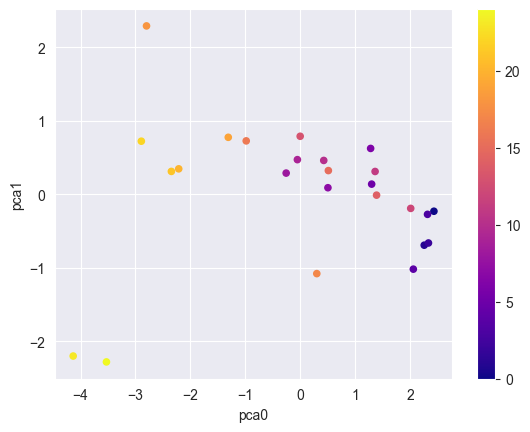

In [19]:
pca_values[['pca0','pca1']].plot(kind='scatter',x='pca0',y='pca1',c=pca_values.index,colormap='plasma')

[03-11-2025 10:05:34] [pca.pca] [INFO] PCA reduction performed to capture 95.0% explained variance using 5 columns of the input data.
[03-11-2025 10:05:34] [pca.pca] [INFO] Fit using PCA.
[03-11-2025 10:05:34] [pca.pca] [INFO] Compute loadings and PCs.
[03-11-2025 10:05:34] [pca.pca] [INFO] Compute explained variance.
[03-11-2025 10:05:34] [pca.pca] [INFO] Number of components is 2 that covers 95.00% explained variance.
[03-11-2025 10:05:34] [pca.pca] [INFO] The PCA reduction is performed on the 5 columns of the input dataframe.
[03-11-2025 10:05:34] [pca.pca] [INFO] Fit using PCA.
[03-11-2025 10:05:34] [pca.pca] [INFO] Compute loadings and PCs.
[03-11-2025 10:05:34] [pca.pca] [INFO] Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[03-11-2025 10:05:34] [pca.pca] [INFO] Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[03-11-2025 10:05:34] [pca.pca] [INFO] Outlier detection using SPE/DmodX with n_std=[3]
[03-11-2025 10:05:34] [pca.pca] [W

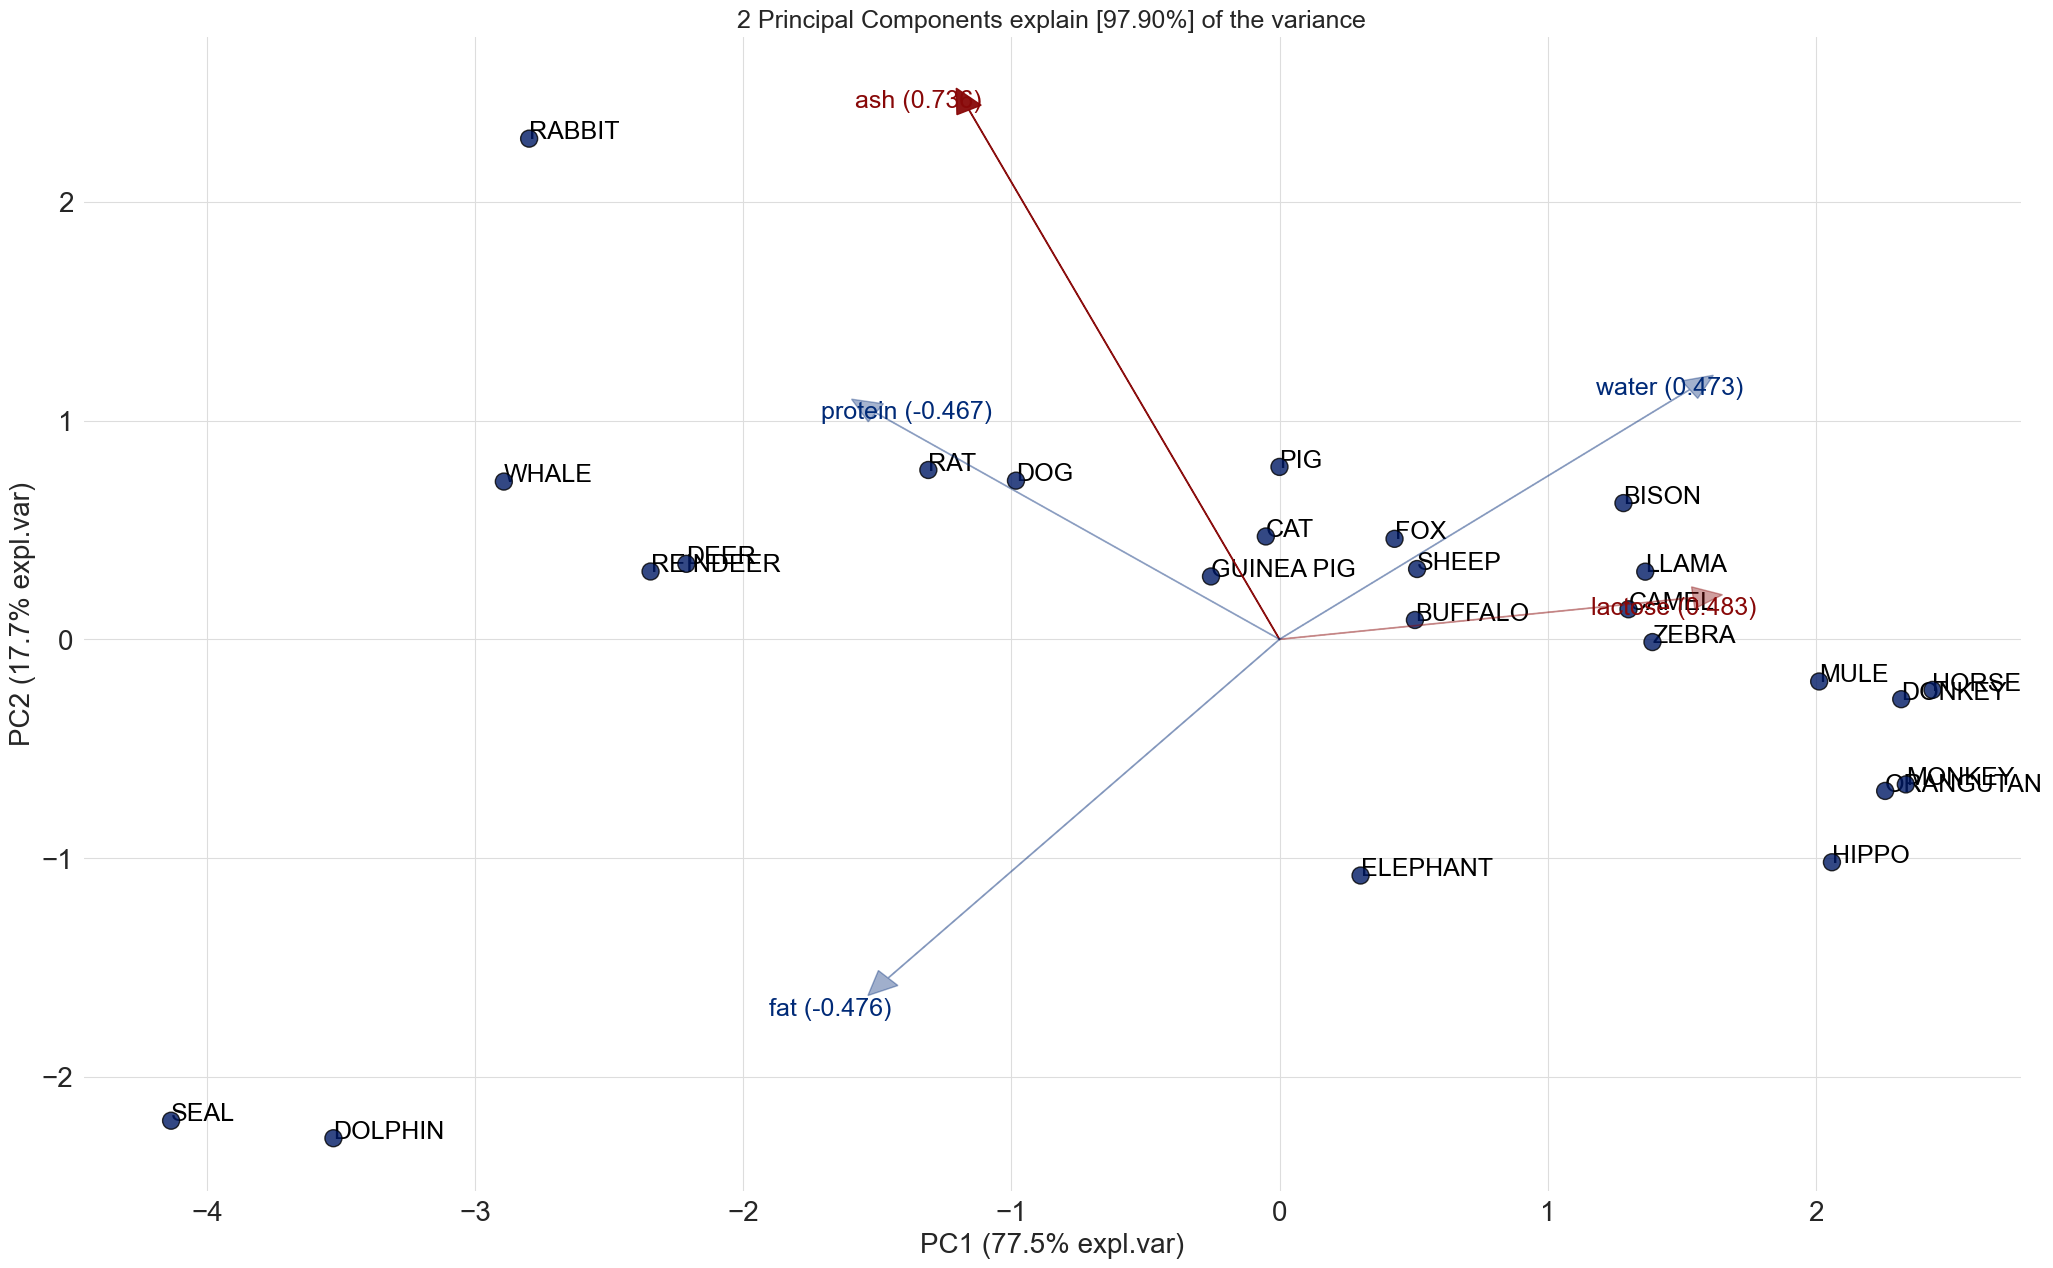

In [57]:
model=pca()
result=model.fit_transform(df_scaled,col_labels=df.columns,row_labels=list(df.index))
model.biplot(label=True,legend=True)
plt.gca().set_facecolor('white')
for i in range(len(df)):
    plt.text(pca_values.values[i,0],pca_values.values[i,1],list(df.index)[i],color='black')

plt.show()

### Sonar

In [73]:
df=pd.read_csv(r"D:\Datasets\Sonar.csv",index_col=0)
df

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
V1,,,,,,,,,,,,,,,,,,,,,
0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,0.2716,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M


In [75]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(df.drop('Class',axis=1),df['Class'],test_size=0.30,random_state=25,stratify=df['Class'])

In [79]:
prcomp=PCA().set_output(transform='pandas')

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
V1,,,,,,,,,,,,,,,,,,,,,
0.0126,0.0519,0.0621,0.0518,0.1072,0.2587,0.2304,0.2067,0.3416,0.4284,0.3015,...,0.0027,0.0208,0.0048,0.0199,0.0126,0.0022,0.0037,0.0034,0.0114,0.0077
0.0340,0.0625,0.0381,0.0257,0.0441,0.1027,0.1287,0.1850,0.2647,0.4117,0.5245,...,0.0329,0.0141,0.0019,0.0067,0.0099,0.0042,0.0057,0.0051,0.0033,0.0058
0.0291,0.0400,0.0771,0.0809,0.0521,0.1051,0.0145,0.0674,0.1294,0.1146,0.0942,...,0.0000,0.0056,0.0237,0.0204,0.0050,0.0137,0.0164,0.0081,0.0139,0.0111
0.0409,0.0421,0.0573,0.0130,0.0183,0.1019,0.1054,0.1070,0.2302,0.2259,0.2373,...,0.0113,0.0028,0.0036,0.0105,0.0120,0.0087,0.0061,0.0061,0.0030,0.0078
0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,0.2720,...,0.0181,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.0176,0.0172,0.0501,0.0285,0.0262,0.0351,0.0362,0.0535,0.0258,0.0474,0.0526,...,0.0088,0.0042,0.0175,0.0171,0.0079,0.0050,0.0112,0.0179,0.0294,0.0063
0.0132,0.0080,0.0188,0.0141,0.0436,0.0668,0.0609,0.0131,0.0899,0.0922,0.1445,...,0.0136,0.0044,0.0028,0.0021,0.0022,0.0048,0.0138,0.0140,0.0028,0.0064
0.0856,0.0454,0.0382,0.0203,0.0385,0.0534,0.2140,0.3110,0.2837,0.2751,0.2707,...,0.0128,0.0172,0.0138,0.0079,0.0037,0.0051,0.0258,0.0102,0.0037,0.0037


In [81]:
from sklearn.svm import SVC

comps=np.arange(2,50)
scores=[]
for c in comps:
    X_trn_pca=prcomp.fit_transform(X_train)
    X_trn_pca=X_trn_pca.iloc[:,:c]
    X_test_pca=prcomp.transform(X_test)
    X_test_pca=X_test_pca.iloc[:,:c]
    svm=SVC(kernel="linear")
    svm.fit(X_trn_pca,y_train)
    y_pred=svm.predict(X_test_pca)
    scores.append([c,accuracy_score(y_test,y_pred)])
df_scores=pd.DataFrame(scores,columns=["comps","score"])
df_scores.sort_values(["score","comps"],ascending=[False,True])

,comps,score
17,19,0.809524
23,25,0.809524
19,21,0.793651
22,24,0.793651
24,26,0.793651
25,27,0.793651
27,29,0.793651
28,30,0.793651
29,31,0.793651
30,32,0.793651


## **HR Analysis**

In [83]:
df=pd.read_csv(r"D:\HR_comma_sep.csv")
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low


In [85]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(df.drop('left',axis=1),df['left'])

In [86]:
ohe=preprocessing.OneHotEncoder(sparse_output=False,drop='first')
trns=compose.make_column_transformer((ohe,compose.make_column_selector(dtype_include='object')),remainder='passthrough',verbose_feature_names_out=False)
trns=trns.set_output(transform='pandas')
scaler=StandardScaler().set_output(transform='pandas')
prcomp=PCA().set_output(transform='pandas')
svc=SVC()
comps=np.arange(2,16)
scores=[]

In [88]:
for c in comps:
    prcomp=PCA(n_components=c).set_output(transform='pandas')
    pipe=pipeline.Pipeline(steps=[
        ("OHE",trns),
        ("SCL",scaler),
        ('PCA',prcomp),
        ("classifier",svc)
    ])

    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append([c,accuracy_score(y_test,y_pred)])

df_scores=pd.DataFrame(data=scores,columns=['n_components','accuracy_score'])
df_scores.sort_values(by=["n_components",'accuracy_score'],ascending=[False,True])

,n_components,accuracy_score
13,15,0.942651
27,15,0.942651
12,14,0.939984
26,14,0.939984
11,13,0.932249
25,13,0.932249
10,12,0.931182
24,12,0.931182
9,11,0.929581
23,11,0.929581


## Kfold cross validation

### stratified
used for classification task

In [100]:
x,y=df.drop(['salary','Department'],axis=1),df['salary']
k_stratified_fold=StratifiedKFold(shuffle=True,n_splits=5,random_state=25)
cross_val_score(estimator=linear_model.LogisticRegression(max_iter=10000),X=x,y=y,cv=k_stratified_fold)

array([0.50816939, 0.50483494, 0.50316772, 0.50050017, 0.50350117])

#### Regression

In [102]:
cross_val_score(estimator=linear_model.LogisticRegression(max_iter=10000),X=x,y=y,cv=KFold(n_splits=5,shuffle=True,random_state=25),scoring="accuracy")

array([0.5015005 , 0.5105035 , 0.50216739, 0.49449817, 0.50050017])

## Grid Search CVm

In [105]:
from warnings import filterwarnings
filterwarnings('ignore')
params={
    'solver':['liblinear','lbfgs','newton-cg','sag','saga'],
    'C':np.linspace(0.001,4,20)
}


gcv=GridSearchCV(estimator=linear_model.LogisticRegression(max_iter=10000),param_grid=params,cv=5,scoring="roc_auc")
gcv.fit(x,y)

,estimator,LogisticRegre...ax_iter=10000)
,param_grid,"{'C': array([1.0000...00000000e+00]), 'solver': ['liblinear', 'lbfgs', ...]}"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'
